In [17]:
import os
import sys
import pandas as pd
import yfinance as yf
# import plotly as px

# Dynamically add the absolute path to the project directory and scripts
project_root = r"C:\Users\hp\Desktop\10Academy\Financial-News-and-Stock-Market-Analysis"
scripts_path = os.path.join(project_root, "scripts")

sys.path.append(project_root)  # Add project root to sys.path
sys.path.append(scripts_path)  # Add scripts directory to sys.path



In [18]:
from scripts.data_load import load_data

# Preview column names
file_path = '../Data/yfinance_data/AAPL_historical_data.csv'
df = pd.read_csv(file_path)
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [20]:
df = pd.read_csv(file_path, parse_dates=['Date'])


In [21]:
df['Date'] = pd.to_datetime(df['Date'],format='ISO8601', errors='coerce')  # Convert 'Date' to datetime
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [22]:
print(df.isnull().sum())  # Count missing values in each column
df.dropna(inplace=True)   # Drop rows with missing values


Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          10998 non-null  datetime64[ns]
 1   Open          10998 non-null  float64       
 2   High          10998 non-null  float64       
 3   Low           10998 non-null  float64       
 4   Close         10998 non-null  float64       
 5   Adj Close     10998 non-null  float64       
 6   Volume        10998 non-null  int64         
 7   Dividends     10998 non-null  float64       
 8   Stock Splits  10998 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 773.4 KB


# Calculate indicators using TA-Lib

In [24]:
import talib
from scripts.financial_analyzer import plot_stock_and_sma, plot_rsi, plot_macd

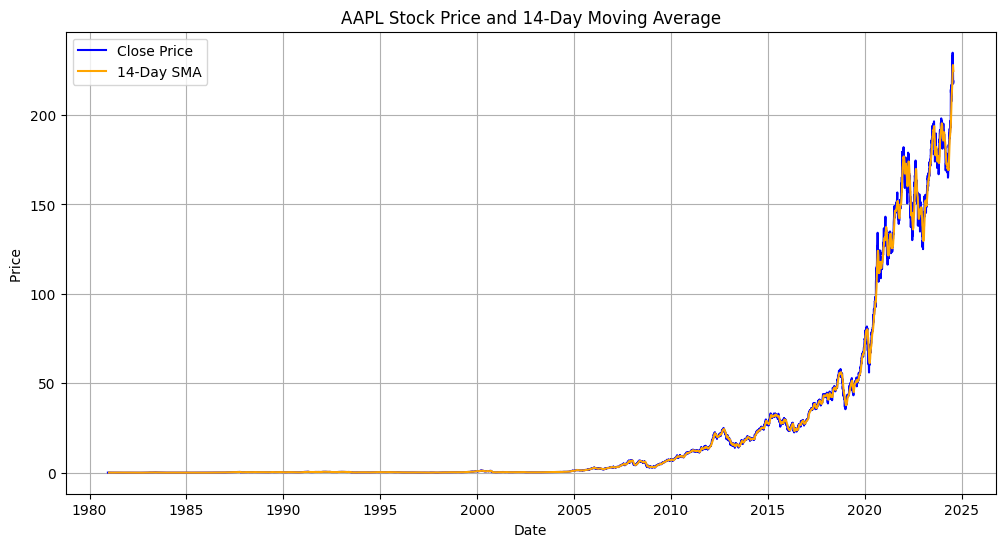

In [25]:

df['SMA_14'] = talib.SMA(df['Close'], timeperiod=14)
plot_stock_and_sma(df)



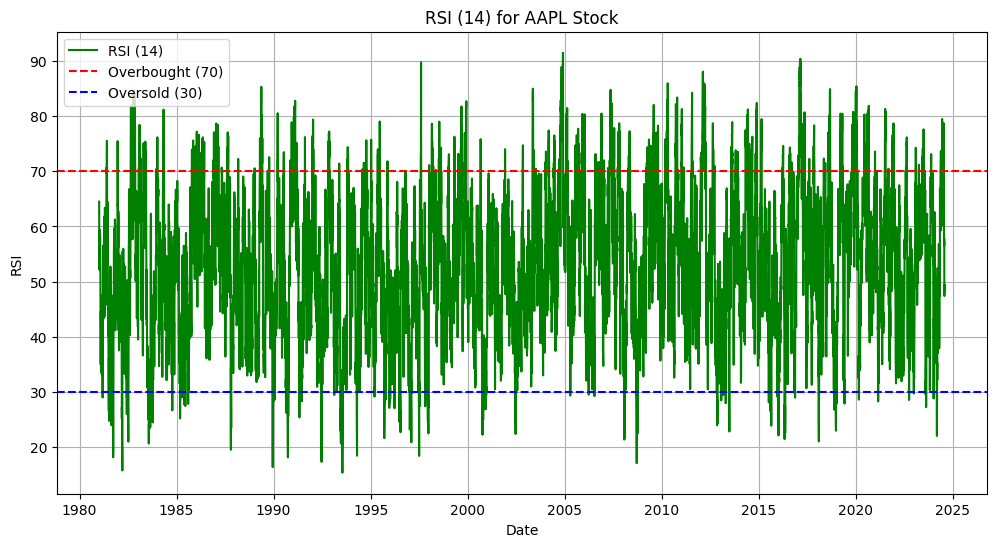

In [26]:
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
plot_rsi(df)

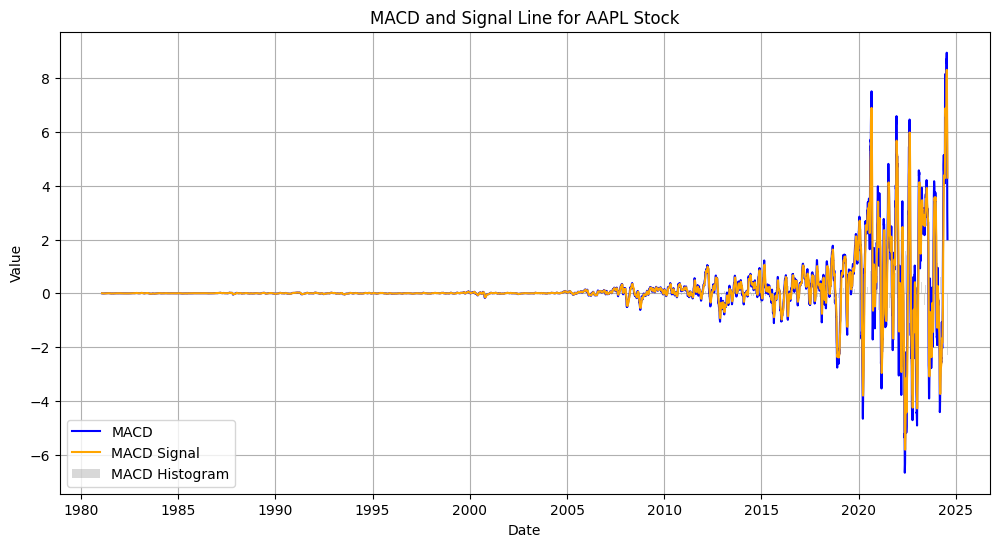

In [27]:
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
plot_macd(df)

In [28]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
tickers.head()



,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [29]:
tickers.shape



(503, 8)

# Portifolio Analysis

In [30]:
from scripts.Fa import retrieve_stock_data

stock_data = retrieve_stock_data("AAPL", "2020-01-01", "2023-01-01")
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796028  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088310  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662720  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320976  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484360  75.797501  76.110001  74.290001  74.290001  132079200


In [ ]:
# Calculate portfolio weights

weights = analyzer.calculate_portfolio_weights(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(weights)

In [ ]:
# Calculate portfolio performance
performance = analyzer.calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(performance)

In [ ]:
# Calculate portfolio performance

portfolio_return, portfolio_volatility, sharpe_ratio = analyzer.calculate_portfolio_performance(['AAPL', 'GOOG', 'MSFT'], '2020-01-01', '2020-12-31')
print(f"Portfolio Return: {portfolio_return:.2f}%")
print(f"Portfolio Volatility: {portfolio_volatility:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")